In [68]:
# import packages
import pandas as pd
import numpy as np
import datetime
import math
from scipy.optimize import minimize, BFGS, LinearConstraint
from scipy.stats.mstats import gmean
import matplotlib.pyplot as plt
import seaborn as sns


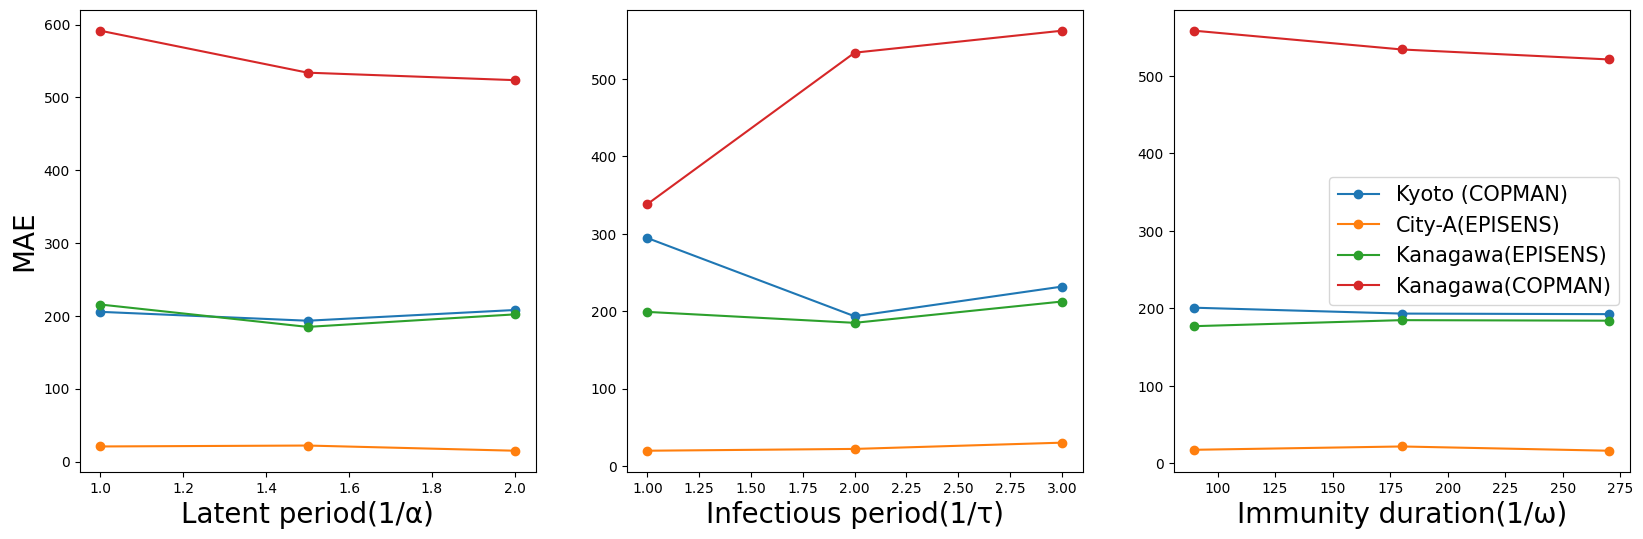

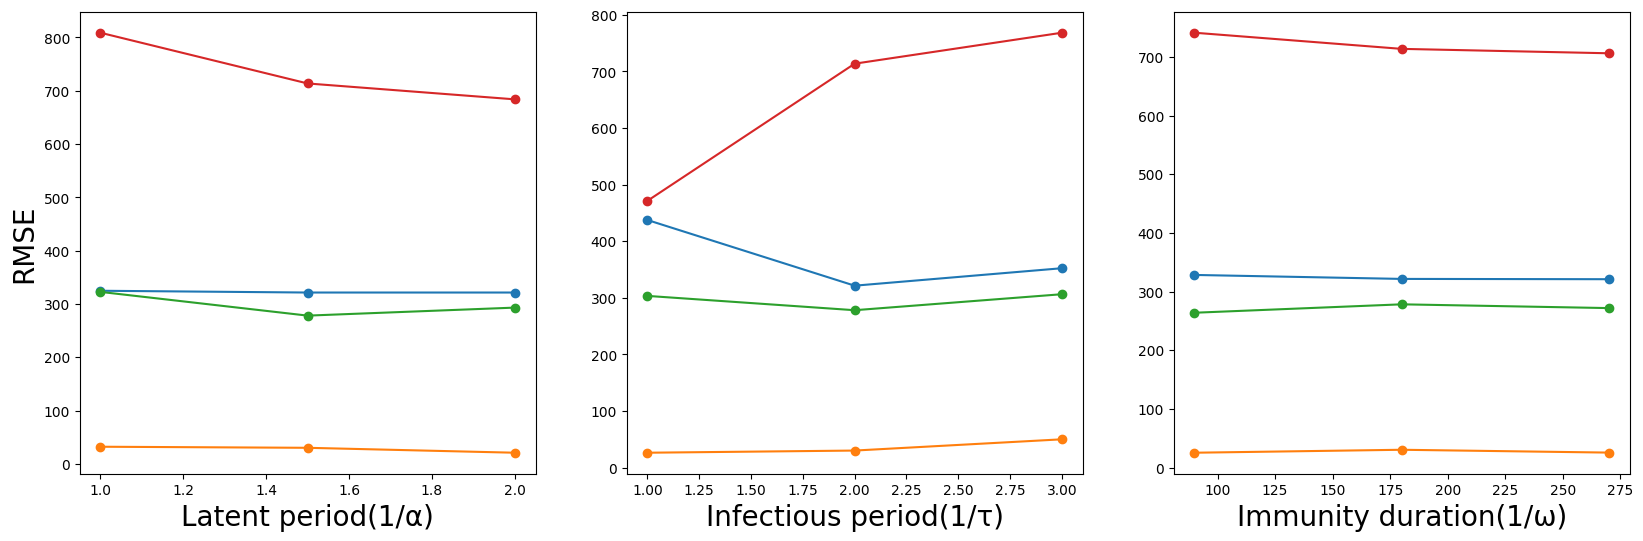

In [72]:
df = pd.read_csv("result_sensitivity_mae.csv")
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
data = df[df["type"]=="latent period(1/α)"].copy()
axes[0].plot(data["val"],data["Kyoto (COPMAN)"]   ,marker="o",linestyle="-",label="Kyoto (COPMAN)")
axes[0].plot(data["val"],data["City-A(EPISENS)"]  ,marker="o",linestyle="-",label="City-A(EPISENS)")
axes[0].plot(data["val"],data["Kanagawa(EPISENS)"],marker="o",linestyle="-",label="Kanagawa(EPISENS)")
axes[0].plot(data["val"],data["Kanagawa(COPMAN)"] ,marker="o",linestyle="-",label="Kanagawa(COPMAN)")
axes[0].set_xlabel('Latent period(1/α)',fontsize=20)
axes[0].set_ylabel('MAE',fontsize=20)
#legend.set_bbox_to_anchor((0.3, 1.5))
data = df[df["type"]=="Infectious period(1/τ)"].copy()
axes[1].plot(data["val"],data["Kyoto (COPMAN)"]   ,marker="o",linestyle="-",label="Kyoto (COPMAN)")
axes[1].plot(data["val"],data["City-A(EPISENS)"]  ,marker="o",linestyle="-",label="City-A(EPISENS)")
axes[1].plot(data["val"],data["Kanagawa(EPISENS)"],marker="o",linestyle="-",label="Kanagawa(EPISENS)")
axes[1].plot(data["val"],data["Kanagawa(COPMAN)"] ,marker="o",linestyle="-",label="Kanagawa(COPMAN)")
axes[1].set_xlabel('Infectious period(1/τ)',fontsize=20)

data = df[df["type"]=="Immunity duration(ω)"].copy()
axes[2].plot(data["val"],data["Kyoto (COPMAN)"]   ,marker="o",linestyle="-",label="Kyoto (COPMAN)")
axes[2].plot(data["val"],data["City-A(EPISENS)"]  ,marker="o",linestyle="-",label="City-A(EPISENS)")
axes[2].plot(data["val"],data["Kanagawa(EPISENS)"],marker="o",linestyle="-",label="Kanagawa(EPISENS)")
axes[2].plot(data["val"],data["Kanagawa(COPMAN)"] ,marker="o",linestyle="-",label="Kanagawa(COPMAN)")
axes[2].set_xlabel('Immunity duration(1/ω)',fontsize=20)

legend = axes[2].legend(fontsize=15)
outputfile = './results/'
plt.savefig(outputfile + '/Sensitivity_mae.png',bbox_inches="tight") 

df = pd.read_csv("result_sensitivity_rmse.csv")
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
data = df[df["type"]=="latent period(1/α)"].copy()
axes[0].plot(data["val"],data["Kyoto (COPMAN)"]   ,marker="o",linestyle="-",label="Kyoto (COPMAN)")
axes[0].plot(data["val"],data["City-A(EPISENS)"]  ,marker="o",linestyle="-",label="City-A(EPISENS)")
axes[0].plot(data["val"],data["Kanagawa(EPISENS)"],marker="o",linestyle="-",label="Kanagawa(EPISENS)")
axes[0].plot(data["val"],data["Kanagawa(COPMAN)"] ,marker="o",linestyle="-",label="Kanagawa(COPMAN)")
axes[0].set_xlabel('Latent period(1/α)',fontsize=20)
axes[0].set_ylabel('RMSE',fontsize=20)
#legend.set_bbox_to_anchor((0.3, 1.5))
data = df[df["type"]=="Infectious period(1/τ)"].copy()
axes[1].plot(data["val"],data["Kyoto (COPMAN)"]   ,marker="o",linestyle="-",label="Kyoto (COPMAN)")
axes[1].plot(data["val"],data["City-A(EPISENS)"]  ,marker="o",linestyle="-",label="City-A(EPISENS)")
axes[1].plot(data["val"],data["Kanagawa(EPISENS)"],marker="o",linestyle="-",label="Kanagawa(EPISENS)")
axes[1].plot(data["val"],data["Kanagawa(COPMAN)"] ,marker="o",linestyle="-",label="Kanagawa(COPMAN)")
axes[1].set_xlabel('Infectious period(1/τ)',fontsize=20)

data = df[df["type"]=="Immunity duration(ω)"].copy()
axes[2].plot(data["val"],data["Kyoto (COPMAN)"]   ,marker="o",linestyle="-",label="Kyoto (COPMAN)")
axes[2].plot(data["val"],data["City-A(EPISENS)"]  ,marker="o",linestyle="-",label="City-A(EPISENS)")
axes[2].plot(data["val"],data["Kanagawa(EPISENS)"],marker="o",linestyle="-",label="Kanagawa(EPISENS)")
axes[2].plot(data["val"],data["Kanagawa(COPMAN)"] ,marker="o",linestyle="-",label="Kanagawa(COPMAN)")
axes[2].set_xlabel('Immunity duration(1/ω)',fontsize=20)
#legend = axes[0].legend(fontsize=10)

outputfile = './results/'
plt.savefig(outputfile + '/Sensitivity_rmse.png',bbox_inches="tight") 

In [66]:
df = pd.read_csv("sensitivity_analysis.csv")
df.columns

Index(['1/α', '1/τ', '1/ω', 'MAE', 'RMSE'], dtype='object')

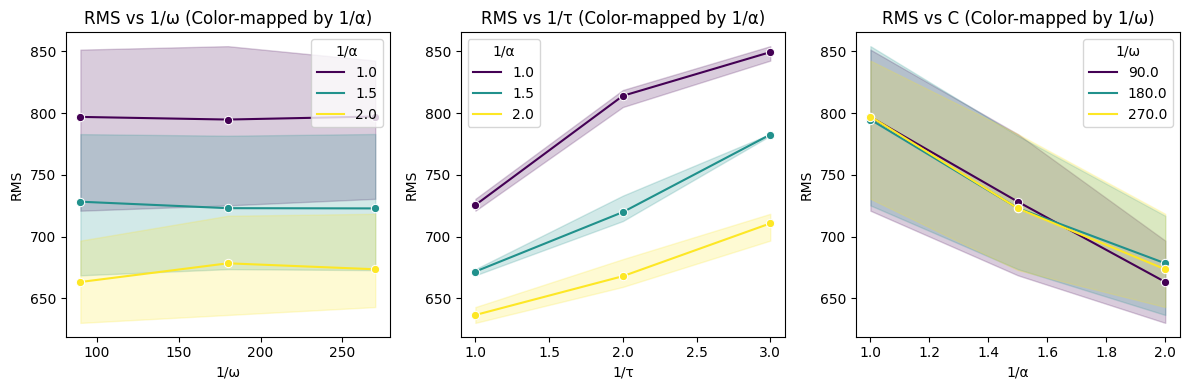

In [67]:
# Create subplots for A, B, and C vs RMS
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
data = df.copy()
sns.lineplot(x='1/ω', y='RMSE', data=data, ax=axes[0], hue='1/α', marker="o",palette='viridis',linestyle="-")
sns.lineplot(x='1/τ', y='RMSE', data=data, ax=axes[1], hue='1/α', marker="o",palette='viridis',linestyle="-")
sns.lineplot(x='1/α', y='RMSE', data=data, ax=axes[2], hue='1/ω', marker="o",palette='viridis',linestyle="-")

# Customize labels and titles
axes[0].set_xlabel('1/ω')
axes[0].set_ylabel('RMS')
axes[0].set_title('RMS vs 1/ω (Color-mapped by 1/α)')

axes[1].set_xlabel('1/τ')
axes[1].set_ylabel('RMS')
axes[1].set_title('RMS vs 1/τ (Color-mapped by 1/α)')

axes[2].set_xlabel('1/α')
axes[2].set_ylabel('RMS')
axes[2].set_title('RMS vs C (Color-mapped by 1/ω)')

plt.tight_layout()
plt.show()